In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# User Analysis- Overlapping users?
(combined_rumor_target.csv)


In [2]:
combined_data = pd.read_csv('sydneysiege/18 targetanalysis/targetdata/combined_rumor_target.csv',encoding='utf-8',header=0,index_col=0)
combined_data.head()

,tweet_id,user_id,date,rumorlabel,tweet,cleaned_text,targetlabel,sentiment,src_reply
0,544269152198721536,443573208,Sun Dec 14 23:14:12 +0000 2014,1,@KristyMayr7 that is not an IS flag specifically.,not flag specifically,0,Neutral,reply
1,544269478406529024,2700238212,Sun Dec 14 23:15:30 +0000 2014,1,@KristyMayr7 omg\r\r\r\nI'm watching it on @mo...,omg im watch,0,Neutral,reply
2,544270016770633728,760246262,Sun Dec 14 23:17:38 +0000 2014,1,"@KristyMayr7 @DeepPolitics dudes, not the flag...",dudes not flag use isis,1,Neutral,reply
3,544270351619067904,2670053628,Sun Dec 14 23:18:58 +0000 2014,1,@KristyMayr7 @bluebuzzbird How pathetic! These...,pathetic poor people,0,Negative,reply
4,544270614442557441,2670053628,Sun Dec 14 23:20:01 +0000 2014,1,@KristyMayr7 @bluebuzzbird Lindt is just a cof...,lindt coffee shop right something else,0,Neutral,reply


In [3]:
combined_data.isnull().sum()

tweet_id        0
user_id         0
date            0
rumorlabel      0
tweet           0
cleaned_text    0
targetlabel     0
sentiment       0
src_reply       0
dtype: int64

In [4]:
# number of users 
no_users = combined_data.user_id.nunique()
print("the total number of users posting rumour tweets is: ",no_users)

the total number of users posting rumour tweets is:  4654


In [5]:
combined_data.groupby(['user_id','targetlabel'])['tweet_id'].count()

user_id     targetlabel
2426        0              2
3968        0              2
7755        0              1
156763      0              1
428333      0              8
                          ..
2925094346  1              1
2927389322  0              1
2927454722  0              1
2927507078  1              1
2927858006  0              1
Name: tweet_id, Length: 5180, dtype: int64

In [7]:
users = pd.pivot_table(combined_data, index=["user_id"], columns=["targetlabel"], values=["tweet_id"], aggfunc='count')
users

tweet_id     
targetlabel        0    1
user_id                  
2426             2.0  NaN
3968             2.0  NaN
7755             1.0  NaN
156763           1.0  NaN
428333           8.0  1.0
...              ...  ...
2925094346       3.0  1.0
2927389322       1.0  NaN
2927454722       1.0  NaN
2927507078       NaN  1.0
2927858006       1.0  NaN

[4654 rows x 2 columns]

In [8]:
nonoverlapping = users[users.isnull().any(axis=1)].index
overlapping = users[~users.isnull().any(axis=1)].index

In [9]:
len(overlapping) + len(nonoverlapping)

4654

In [10]:
print("the total number of overlapping users is {}; the percentage of overlapping users is {:.2f}".format(len(overlapping),len(overlapping)/no_users))
print("the total number of non-overlapping users is {}; the percentage of non-overlapping users is {:.2f}".format(len(nonoverlapping),len(nonoverlapping)/no_users))

the total number of overlapping users is 526; the percentage of overlapping users is 0.11
the total number of non-overlapping users is 4128; the percentage of non-overlapping users is 0.89


## overlapping user analysis


In [11]:
overlapping_count = users.loc[users.index.isin(overlapping),]
overlapping_count.columns = ['non-target','target']
overlapping_count

,non-target,target
user_id,,
428333,8.0,1.0
741803,3.0,1.0
759251,1.0,1.0
972651,3.0,2.0
1367531,12.0,1.0
...,...,...
2911502292,2.0,2.0
2912429401,1.0,1.0
2921091842,2.0,4.0


In [12]:
overlapping_per = overlapping_count.div(overlapping_count.sum(axis=1), axis=0).round(3)*100
overlapping_count = pd.merge(overlapping_count, overlapping_per,on='user_id',suffixes=['','(%)'])
overlapping_count

,non-target,target,non-target(%),target(%)
user_id,,,,
428333,8.0,1.0,88.9,11.1
741803,3.0,1.0,75.0,25.0
759251,1.0,1.0,50.0,50.0
972651,3.0,2.0,60.0,40.0
1367531,12.0,1.0,92.3,7.7
...,...,...,...,...
2911502292,2.0,2.0,50.0,50.0
2912429401,1.0,1.0,50.0,50.0
2921091842,2.0,4.0,33.3,66.7


In [13]:
overlapping_count['tendency'] = pd.Series()
for i in range(len(overlapping)):
  if overlapping_count.iloc[i,0] > overlapping_count.iloc[i,1]:
    overlapping_count.iloc[i,4] = 'non-target'
  elif overlapping_count.iloc[i,0] < overlapping_count.iloc[i,1]:
   overlapping_count.iloc[i,4] ='target'
  else:
    overlapping_count.iloc[i,4] = 'neutral'

<ipython-input-13-4c8d2e1deb4a>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  overlapping_count['tendency'] = pd.Series()


In [14]:
overlapping_count

,non-target,target,non-target(%),target(%),tendency
user_id,,,,,
428333,8.0,1.0,88.9,11.1,non-target
741803,3.0,1.0,75.0,25.0,non-target
759251,1.0,1.0,50.0,50.0,neutral
972651,3.0,2.0,60.0,40.0,non-target
1367531,12.0,1.0,92.3,7.7,non-target
...,...,...,...,...,...
2911502292,2.0,2.0,50.0,50.0,neutral
2912429401,1.0,1.0,50.0,50.0,neutral
2921091842,2.0,4.0,33.3,66.7,target


In [22]:
print(overlapping_count.tendency.value_counts())
overlapping_count.tendency.value_counts(normalize=True)

non-target    219
neutral       219
target         88
Name: tendency, dtype: int64


non-target    0.41635
neutral       0.41635
target        0.16730
Name: tendency, dtype: float64

<AxesSubplot:xlabel='tendency', ylabel='count'>

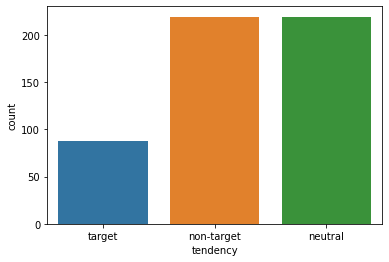

In [16]:
sns.countplot(data = overlapping_count, x = 'tendency',order = ['target','non-target','neutral'])

## non-overlapping user analysis


In [17]:
nonoverlapping_count = users.loc[users.index.isin(nonoverlapping),]
nonoverlapping_count.columns = ['non-target','target']
nonoverlapping_count

,non-target,target
user_id,,
2426,2.0,NaN
3968,2.0,NaN
7755,1.0,NaN
156763,1.0,NaN
690463,1.0,NaN
...,...,...
2924117172,1.0,NaN
2927389322,1.0,NaN
2927454722,1.0,NaN


In [18]:
nonoverlapping_count['tendency'] = pd.Series()
for i in range(len(nonoverlapping)):
  if nonoverlapping_count.iloc[i,0] >= 1 :
    nonoverlapping_count.iloc[i,2] = 'non-target'
  elif nonoverlapping_count.iloc[i,1] >= 1:
    nonoverlapping_count.iloc[i,2] = 'target'

<ipython-input-18-88b0360c8225>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nonoverlapping_count['tendency'] = pd.Series()
<ipython-input-18-88b0360c8225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonoverlapping_count['tendency'] = pd.Series()


In [19]:
print(nonoverlapping_count.tendency.isnull().sum())
nonoverlapping_count

0


,non-target,target,tendency
user_id,,,
2426,2.0,NaN,non-target
3968,2.0,NaN,non-target
7755,1.0,NaN,non-target
156763,1.0,NaN,non-target
690463,1.0,NaN,non-target
...,...,...,...
2924117172,1.0,NaN,non-target
2927389322,1.0,NaN,non-target
2927454722,1.0,NaN,non-target


In [23]:
print(nonoverlapping_count.tendency.value_counts())
nonoverlapping_count.tendency.value_counts(normalize=True)

non-target    3289
target         839
Name: tendency, dtype: int64


non-target    0.796754
target        0.203246
Name: tendency, dtype: float64

<AxesSubplot:xlabel='tendency', ylabel='count'>

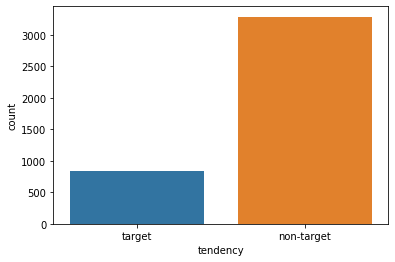

In [21]:
sns.countplot(data = nonoverlapping_count, x = 'tendency',order = ['target','non-target'])

# User Analysis- Overlapping users (on Src tws only)

rumor_src

In [24]:
rumor_src = combined_data.loc[combined_data['src_reply']=='src',]

In [25]:
# number of users 
no_users = rumor_src.user_id.nunique()
print("the total number of users posting rumour tweets is: ",no_users)

the total number of users posting rumour tweets is:  185


In [26]:
rumor_src.groupby(['user_id','targetlabel'])['tweet_id'].count()

user_id     targetlabel
428333      0              8
            1              1
742143      0              7
759251      0              1
            1              1
                          ..
2271035214  0              1
2738397743  1              2
2799960092  0              2
2836941830  1              1
2897135260  0              1
Name: tweet_id, Length: 215, dtype: int64

In [27]:
users_src = pd.pivot_table(rumor_src, index=["user_id"], columns=["targetlabel"], values=["tweet_id"], aggfunc='count')
users_src

tweet_id     
targetlabel        0    1
user_id                  
428333           8.0  1.0
742143           7.0  NaN
759251           1.0  1.0
788524           1.0  NaN
807095           3.0  NaN
...              ...  ...
2271035214       1.0  NaN
2738397743       NaN  2.0
2799960092       2.0  NaN
2836941830       NaN  1.0
2897135260       1.0  NaN

[185 rows x 2 columns]

In [28]:
nonoverlapping = users_src[users_src.isnull().any(axis=1)].index
overlapping = users_src[~users_src.isnull().any(axis=1)].index

In [29]:
len(overlapping) + len(nonoverlapping)

185

In [30]:
print("the total number of overlapping users is {}; the percentage of overlapping users is {:.2f}".format(len(overlapping),len(overlapping)/no_users))
print("the total number of non-overlapping users is {}; the percentage of non-overlapping users is {:.2f}".format(len(nonoverlapping),len(nonoverlapping)/no_users))

the total number of overlapping users is 30; the percentage of overlapping users is 0.16
the total number of non-overlapping users is 155; the percentage of non-overlapping users is 0.84


## overlapping user analysis


In [31]:
overlapping_count = users_src.loc[users_src.index.isin(overlapping),]
overlapping_count.columns = ['non-target','target']
overlapping_count

,non-target,target
user_id,,
428333,8.0,1.0
759251,1.0,1.0
972651,3.0,2.0
1367531,12.0,1.0
1652541,2.0,3.0
2097571,6.0,1.0
7587032,15.0,1.0
14173315,5.0,1.0
14940354,2.0,1.0


In [32]:
overlapping_per = overlapping_count.div(overlapping_count.sum(axis=1), axis=0).round(3)*100
overlapping_count = pd.merge(overlapping_count, overlapping_per,on='user_id',suffixes=['','(%)'])
overlapping_count

,non-target,target,non-target(%),target(%)
user_id,,,,
428333,8.0,1.0,88.9,11.1
759251,1.0,1.0,50.0,50.0
972651,3.0,2.0,60.0,40.0
1367531,12.0,1.0,92.3,7.7
1652541,2.0,3.0,40.0,60.0
2097571,6.0,1.0,85.7,14.3
7587032,15.0,1.0,93.8,6.2
14173315,5.0,1.0,83.3,16.7
14940354,2.0,1.0,66.7,33.3


In [33]:
overlapping_count['tendency'] = pd.Series()
for i in range(len(overlapping)):
  if overlapping_count.iloc[i,0] > overlapping_count.iloc[i,1]:
    overlapping_count.iloc[i,4] = 'non-target'
  elif overlapping_count.iloc[i,0] < overlapping_count.iloc[i,1]:
   overlapping_count.iloc[i,4] ='target'
  else:
    overlapping_count.iloc[i,4] = 'neutral'

<ipython-input-33-4c8d2e1deb4a>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  overlapping_count['tendency'] = pd.Series()


In [34]:
overlapping_count

,non-target,target,non-target(%),target(%),tendency
user_id,,,,,
428333,8.0,1.0,88.9,11.1,non-target
759251,1.0,1.0,50.0,50.0,neutral
972651,3.0,2.0,60.0,40.0,non-target
1367531,12.0,1.0,92.3,7.7,non-target
1652541,2.0,3.0,40.0,60.0,target
2097571,6.0,1.0,85.7,14.3,non-target
7587032,15.0,1.0,93.8,6.2,non-target
14173315,5.0,1.0,83.3,16.7,non-target
14940354,2.0,1.0,66.7,33.3,non-target


In [36]:
print(overlapping_count.tendency.value_counts())
print(overlapping_count.tendency.value_counts(normalize=True))

non-target    22
neutral        7
target         1
Name: tendency, dtype: int64
non-target    0.733333
neutral       0.233333
target        0.033333
Name: tendency, dtype: float64


<AxesSubplot:xlabel='tendency', ylabel='count'>

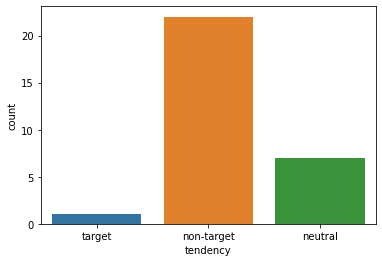

In [37]:
sns.countplot(data = overlapping_count, x = 'tendency',order = ['target','non-target','neutral'])

## non-overlapping user analysis


In [38]:
nonoverlapping_count = users_src.loc[users_src.index.isin(nonoverlapping),]
nonoverlapping_count.columns = ['non-target','target']
nonoverlapping_count

,non-target,target
user_id,,
742143,7.0,NaN
788524,1.0,NaN
807095,3.0,NaN
1140451,1.0,NaN
2467791,1.0,NaN
...,...,...
2271035214,1.0,NaN
2738397743,NaN,2.0
2799960092,2.0,NaN


In [39]:
nonoverlapping_count['tendency'] = pd.Series()
for i in range(len(nonoverlapping)):
  if nonoverlapping_count.iloc[i,0] >= 1 :
    nonoverlapping_count.iloc[i,2] = 'non-target'
  elif nonoverlapping_count.iloc[i,1] >= 1:
    nonoverlapping_count.iloc[i,2] = 'target'

<ipython-input-39-88b0360c8225>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nonoverlapping_count['tendency'] = pd.Series()
<ipython-input-39-88b0360c8225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonoverlapping_count['tendency'] = pd.Series()


In [40]:
print(nonoverlapping_count.tendency.isnull().sum())
nonoverlapping_count

0


,non-target,target,tendency
user_id,,,
742143,7.0,NaN,non-target
788524,1.0,NaN,non-target
807095,3.0,NaN,non-target
1140451,1.0,NaN,non-target
2467791,1.0,NaN,non-target
...,...,...,...
2271035214,1.0,NaN,non-target
2738397743,NaN,2.0,target
2799960092,2.0,NaN,non-target


In [42]:
print(nonoverlapping_count.tendency.value_counts())
nonoverlapping_count.tendency.value_counts(normalize = True)

non-target    122
target         33
Name: tendency, dtype: int64


non-target    0.787097
target        0.212903
Name: tendency, dtype: float64

In [ ]:
sns.countplot(data = nonoverlapping_count, x = 'tendency',order = ['target','non-target'])

# User Analysis- Overlapping users (on Reply tws only)

temp_rumor

In [43]:
temp_rumor = combined_data.loc[combined_data['src_reply']=='reply',]

In [44]:
# number of users 
no_users = temp_rumor.user_id.nunique()
print("the total number of users posting rumour tweets is: ",no_users)

the total number of users posting rumour tweets is:  4506


In [45]:
temp_rumor.groupby(['user_id','targetlabel'])['tweet_id'].count()

user_id     targetlabel
2426        0              2
3968        0              2
7755        0              1
156763      0              1
690463      0              1
                          ..
2925094346  1              1
2927389322  0              1
2927454722  0              1
2927507078  1              1
2927858006  0              1
Name: tweet_id, Length: 4998, dtype: int64

In [46]:
users_reply = pd.pivot_table(temp_rumor, index=["user_id"], columns=["targetlabel"], values=["tweet_id"], aggfunc='count')
users_reply

tweet_id     
targetlabel        0    1
user_id                  
2426             2.0  NaN
3968             2.0  NaN
7755             1.0  NaN
156763           1.0  NaN
690463           1.0  NaN
...              ...  ...
2925094346       3.0  1.0
2927389322       1.0  NaN
2927454722       1.0  NaN
2927507078       NaN  1.0
2927858006       1.0  NaN

[4506 rows x 2 columns]

In [47]:
nonoverlapping = users_reply[users_reply.isnull().any(axis=1)].index
overlapping = users_reply[~users_reply.isnull().any(axis=1)].index

In [49]:
len(overlapping) + len(nonoverlapping)

4506

In [50]:
print("the total number of overlapping users is {}; the percentage of overlapping users is {:.2f}".format(len(overlapping),len(overlapping)/no_users))
print("the total number of non-overlapping users is {}; the percentage of non-overlapping users is {:.2f}".format(len(nonoverlapping),len(nonoverlapping)/no_users))

the total number of overlapping users is 492; the percentage of overlapping users is 0.11
the total number of non-overlapping users is 4014; the percentage of non-overlapping users is 0.89


## overlapping user analysis


In [51]:
overlapping_count = users_reply.loc[users_reply.index.isin(overlapping),]
overlapping_count.columns = ['non-target','target']
overlapping_count

,non-target,target
user_id,,
741803,3.0,1.0
5402612,1.0,2.0
7321402,4.0,1.0
7439352,3.0,1.0
9138142,2.0,1.0
...,...,...
2911502292,2.0,2.0
2912429401,1.0,1.0
2921091842,2.0,4.0


In [52]:
overlapping_per = overlapping_count.div(overlapping_count.sum(axis=1), axis=0).round(3)*100
overlapping_count = pd.merge(overlapping_count, overlapping_per,on='user_id',suffixes=['','(%)'])
overlapping_count

,non-target,target,non-target(%),target(%)
user_id,,,,
741803,3.0,1.0,75.0,25.0
5402612,1.0,2.0,33.3,66.7
7321402,4.0,1.0,80.0,20.0
7439352,3.0,1.0,75.0,25.0
9138142,2.0,1.0,66.7,33.3
...,...,...,...,...
2911502292,2.0,2.0,50.0,50.0
2912429401,1.0,1.0,50.0,50.0
2921091842,2.0,4.0,33.3,66.7


In [53]:
overlapping_count['tendency'] = pd.Series()
for i in range(len(overlapping)):
  if overlapping_count.iloc[i,0] > overlapping_count.iloc[i,1]:
    overlapping_count.iloc[i,4] = 'non-target'
  elif overlapping_count.iloc[i,0] < overlapping_count.iloc[i,1]:
   overlapping_count.iloc[i,4] ='target'
  else:
    overlapping_count.iloc[i,4] = 'neutral'

<ipython-input-53-4c8d2e1deb4a>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  overlapping_count['tendency'] = pd.Series()


In [54]:
overlapping_count

,non-target,target,non-target(%),target(%),tendency
user_id,,,,,
741803,3.0,1.0,75.0,25.0,non-target
5402612,1.0,2.0,33.3,66.7,target
7321402,4.0,1.0,80.0,20.0,non-target
7439352,3.0,1.0,75.0,25.0,non-target
9138142,2.0,1.0,66.7,33.3,non-target
...,...,...,...,...,...
2911502292,2.0,2.0,50.0,50.0,neutral
2912429401,1.0,1.0,50.0,50.0,neutral
2921091842,2.0,4.0,33.3,66.7,target


In [56]:
print(overlapping_count.tendency.value_counts())
overlapping_count.tendency.value_counts(normalize=True)

neutral       211
non-target    192
target         89
Name: tendency, dtype: int64


neutral       0.428862
non-target    0.390244
target        0.180894
Name: tendency, dtype: float64

<AxesSubplot:xlabel='tendency', ylabel='count'>

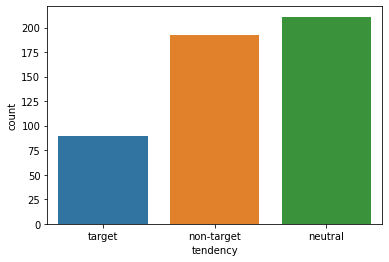

In [57]:
sns.countplot(data = overlapping_count, x = 'tendency',order = ['target','non-target','neutral'])

## non-overlapping user analysis


In [58]:
nonoverlapping_count = users_reply.loc[users_reply.index.isin(nonoverlapping),]
nonoverlapping_count.columns = ['non-target','target']
nonoverlapping_count

,non-target,target
user_id,,
2426,2.0,NaN
3968,2.0,NaN
7755,1.0,NaN
156763,1.0,NaN
690463,1.0,NaN
...,...,...
2924117172,1.0,NaN
2927389322,1.0,NaN
2927454722,1.0,NaN


In [59]:
nonoverlapping_count['tendency'] = pd.Series()
for i in range(len(nonoverlapping)):
  if nonoverlapping_count.iloc[i,0] >= 1 :
    nonoverlapping_count.iloc[i,2] = 'non-target'
  elif nonoverlapping_count.iloc[i,1] >= 1:
    nonoverlapping_count.iloc[i,2] = 'target'

<ipython-input-59-88b0360c8225>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nonoverlapping_count['tendency'] = pd.Series()
<ipython-input-59-88b0360c8225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonoverlapping_count['tendency'] = pd.Series()


In [60]:
print(nonoverlapping_count.tendency.isnull().sum())
nonoverlapping_count

0


,non-target,target,tendency
user_id,,,
2426,2.0,NaN,non-target
3968,2.0,NaN,non-target
7755,1.0,NaN,non-target
156763,1.0,NaN,non-target
690463,1.0,NaN,non-target
...,...,...,...
2924117172,1.0,NaN,non-target
2927389322,1.0,NaN,non-target
2927454722,1.0,NaN,non-target


In [62]:
print(nonoverlapping_count.tendency.value_counts())
nonoverlapping_count.tendency.value_counts(normalize=True)

non-target    3197
target         817
Name: tendency, dtype: int64


non-target    0.796462
target        0.203538
Name: tendency, dtype: float64

<AxesSubplot:xlabel='tendency', ylabel='count'>

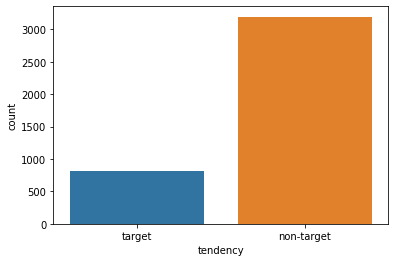

In [63]:
sns.countplot(data = nonoverlapping_count, x = 'tendency',order = ['target','non-target'])

# Who both users of source tweet & replies 

In [ ]:
combined_data = pd.read_csv('combined_rumor_target.csv',encoding='utf-8',header=0,index_col=0)

In [64]:
src_reply  = pd.pivot_table(combined_data, index=["user_id"], columns=["src_reply"], values=["tweet_id"], aggfunc='count')

src_reply_userid = src_reply[~src_reply.isnull().any(axis=1)].index

In [65]:
len(src_reply_userid)

37

In [83]:
src_reply_user = combined_data[combined_data.user_id.isin(src_reply_userid)]
user = pd.pivot_table(src_reply_user, index=["user_id"], columns=["targetlabel"], values=["tweet_id"], aggfunc='count')
user.columns = ['non-target','target']
user

,non-target,target
user_id,,
5402612,16.0,2.0
9507342,4.0,NaN
14173315,6.0,1.0
14460241,3.0,NaN
14515799,2.0,NaN
15250661,5.0,NaN
16930489,1.0,1.0
17919393,2.0,1.0
18965916,2.0,NaN


In [84]:
nonoverlap = user[user.isnull().any(axis=1)].index
overlap = user[~user.isnull().any(axis=1)].index
print("the number of overlapping users among these 37 people: {}".format(len(overlap)))
print("the number of non-overlapping users among these 37 people: {}".format(len(nonoverlap)))

the number of overlapping users among these 37 people: 17
the number of non-overlapping users among these 37 people: 20


In [86]:
user['overlap'] = pd.Series()
for i in user.index:
  if i in nonoverlap:
    user.loc[i,'overlap'] ='nonoverlap'
  elif i in overlap:
    user.loc[i,'overlap'] ='overlap'
user

<ipython-input-86-045f79bd29a2>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  user['overlap'] = pd.Series()


,non-target,target,overlap
user_id,,,
5402612,16.0,2.0,overlap
9507342,4.0,NaN,nonoverlap
14173315,6.0,1.0,overlap
14460241,3.0,NaN,nonoverlap
14515799,2.0,NaN,nonoverlap
15250661,5.0,NaN,nonoverlap
16930489,1.0,1.0,overlap
17919393,2.0,1.0,overlap
18965916,2.0,NaN,nonoverlap


user_id
5402612       18.0
9507342        4.0
14173315       7.0
14460241       3.0
14515799       2.0
15250661       5.0
16930489       2.0
17919393       3.0
18965916       2.0
20639175      11.0
22931893       9.0
23055689       2.0
27831488       3.0
46078438       2.0
49591803       5.0
64643056      27.0
74014041       9.0
115393565      2.0
136191905      3.0
146765658      2.0
162304163      3.0
182251918      2.0
254873869      2.0
291859009      2.0
322572436      4.0
393469195      2.0
464311706      3.0
499696436      3.0
508110571     24.0
548203324      2.0
718612494      2.0
872683897      2.0
1056552596     3.0
1672611397    14.0
2163076560     2.0
2271035214     3.0
2738397743     7.0
dtype: float64
count    37.000000
mean      5.432432
std       6.094353
min       2.000000
25%       2.000000
50%       3.000000
75%       5.000000
max      27.000000
dtype: float64


<ipython-input-90-1b1997f69b32>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(user.sum(axis =1))#.sort_values(ascending=False))
<ipython-input-90-1b1997f69b32>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(user.sum(axis=1).describe())
<ipython-input-90-1b1997f69b32>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tw_count_hist = user.sum(axis=1).hist()


Text(0.5, 1.0, 'the distributon of tweets')

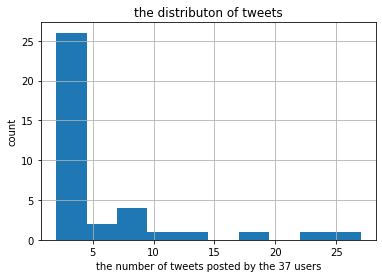

In [90]:
print(user.sum(axis =1))#.sort_values(ascending=False))
print(user.sum(axis=1).describe())
tw_count_hist = user.sum(axis=1).hist()
tw_count_hist.set_xlabel('the number of tweets posted by the 37 users')
tw_count_hist.set_ylabel('count')
tw_count_hist.set_title('the distributon of tweets')
# plt.savefig('src_reply_count.pdf',dpi= 1000)  

## over-lapping users analysis

In [85]:
overlapping_count = user.loc[user.index.isin(overlap),]
overlapping_count.columns = ['non-target','target']
overlapping_count

,non-target,target
user_id,,
5402612,16.0,2.0
14173315,6.0,1.0
16930489,1.0,1.0
17919393,2.0,1.0
20639175,8.0,3.0
22931893,8.0,1.0
49591803,2.0,3.0
64643056,21.0,6.0
74014041,5.0,4.0


In [70]:
overlapping_per = overlapping_count.div(overlapping_count.sum(axis=1), axis=0).round(3)*100
overlapping_count = pd.merge(overlapping_count, overlapping_per,on='user_id',suffixes=['','(%)'])
overlapping_count

,non-target,target,non-target(%),target(%)
user_id,,,,
5402612,16.0,2.0,88.9,11.1
14173315,6.0,1.0,85.7,14.3
16930489,1.0,1.0,50.0,50.0
17919393,2.0,1.0,66.7,33.3
20639175,8.0,3.0,72.7,27.3
22931893,8.0,1.0,88.9,11.1
49591803,2.0,3.0,40.0,60.0
64643056,21.0,6.0,77.8,22.2
74014041,5.0,4.0,55.6,44.4


In [71]:
overlapping_count['tendency'] = pd.Series()
for i in range(len(overlap)):
  if overlapping_count.iloc[i,0] > overlapping_count.iloc[i,1]:
    overlapping_count.iloc[i,4] = 'non-target'
  elif overlapping_count.iloc[i,0] < overlapping_count.iloc[i,1]:
   overlapping_count.iloc[i,4] ='target'
  else:
    overlapping_count.iloc[i,4] = 'neutral'
overlapping_count

<ipython-input-71-39d239c892e8>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  overlapping_count['tendency'] = pd.Series()


,non-target,target,non-target(%),target(%),tendency
user_id,,,,,
5402612,16.0,2.0,88.9,11.1,non-target
14173315,6.0,1.0,85.7,14.3,non-target
16930489,1.0,1.0,50.0,50.0,neutral
17919393,2.0,1.0,66.7,33.3,non-target
20639175,8.0,3.0,72.7,27.3,non-target
22931893,8.0,1.0,88.9,11.1,non-target
49591803,2.0,3.0,40.0,60.0,target
64643056,21.0,6.0,77.8,22.2,non-target
74014041,5.0,4.0,55.6,44.4,non-target


In [74]:
print(overlapping_count.tendency.value_counts())
overlapping_count.tendency.value_counts(normalize = True)

non-target    13
neutral        3
target         1
Name: tendency, dtype: int64


non-target    0.764706
neutral       0.176471
target        0.058824
Name: tendency, dtype: float64

## non-overlapping user analysis

In [78]:
nonoverlapping_count = user.loc[user.index.isin(nonoverlap),]
nonoverlapping_count.columns = ['non-target','target']
nonoverlapping_count


,non-target,target
user_id,,
9507342,4.0,NaN
14460241,3.0,NaN
14515799,2.0,NaN
15250661,5.0,NaN
18965916,2.0,NaN
23055689,2.0,NaN
27831488,3.0,NaN
46078438,NaN,2.0
115393565,NaN,2.0


In [79]:
nonoverlapping_count['tendency'] = pd.Series()
for i in range(len(nonoverlap)):
  if nonoverlapping_count.iloc[i,0] >= 1 :
    nonoverlapping_count.iloc[i,2] = 'non-target'
  elif nonoverlapping_count.iloc[i,1] >= 1:
    nonoverlapping_count.iloc[i,2] = 'target'

<ipython-input-79-f06fef6477e6>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nonoverlapping_count['tendency'] = pd.Series()
<ipython-input-79-f06fef6477e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonoverlapping_count['tendency'] = pd.Series()


In [80]:
print(nonoverlapping_count.tendency.isnull().sum())
nonoverlapping_count

0


,non-target,target,tendency
user_id,,,
9507342,4.0,NaN,non-target
14460241,3.0,NaN,non-target
14515799,2.0,NaN,non-target
15250661,5.0,NaN,non-target
18965916,2.0,NaN,non-target
23055689,2.0,NaN,non-target
27831488,3.0,NaN,non-target
46078438,NaN,2.0,target
115393565,NaN,2.0,target


In [81]:
print(nonoverlapping_count.tendency.value_counts())
nonoverlapping_count.tendency.value_counts(normalize=True)

non-target    16
target         4
Name: tendency, dtype: int64


non-target    0.8
target        0.2
Name: tendency, dtype: float64

## 

<AxesSubplot:xlabel='overlap', ylabel='target'>

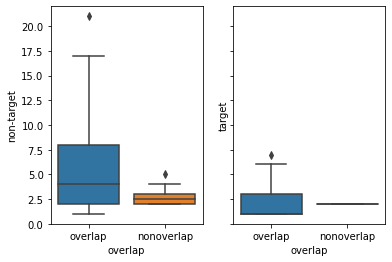

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=user, x="overlap",y='non-target',ax = ax1)
sns.boxplot(data=user,  x="overlap",y="target",ax = ax2)

In [91]:
user.groupby('overlap').describe()

non-target                                               target  \
                count      mean       std  min  25%  50%  75%   max  count   
overlap                                                                      
nonoverlap       16.0  2.687500  0.873212  2.0  2.0  2.5  3.0   5.0    4.0   
overlap          17.0  6.470588  6.266156  1.0  2.0  4.0  8.0  21.0   17.0   

                                                         
                mean       std  min  25%  50%  75%  max  
overlap                                                  
nonoverlap  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
overlap     2.352941  1.868863  1.0  1.0  1.0  3.0  7.0

In [92]:
count_long = src_reply_user.groupby(['user_id','targetlabel'])['tweet_id'].count().to_frame('count').reset_index(drop=False)
count_long

,user_id,targetlabel,count
0,5402612,0,16
1,5402612,1,2
2,9507342,0,4
3,14173315,0,6
4,14173315,1,1
5,14460241,0,3
6,14515799,0,2
7,15250661,0,5
8,16930489,0,1
9,16930489,1,1


In [93]:
count_long['count'].describe()

count    54.000000
mean      3.722222
std       4.085948
min       1.000000
25%       2.000000
50%       2.000000
75%       3.750000
max      21.000000
Name: count, dtype: float64

<AxesSubplot:xlabel='targetlabel', ylabel='count'>

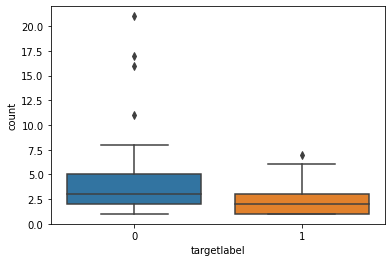

In [94]:
sns.boxplot(data=count_long,y='count',x = 'targetlabel')

## look at those tweeted no less than 3

since half of these 28 people tweeted within 3.

who had tweet more or equal to 3


In [96]:
overall = user.sum(axis=1)
engage_user = overall[overall>=3].index
print(len(engage_user))
engage_user

22


<ipython-input-96-8d89a94c2b77>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall = user.sum(axis=1)


Int64Index([   5402612,    9507342,   14173315,   14460241,   15250661,
              17919393,   20639175,   22931893,   27831488,   49591803,
              64643056,   74014041,  136191905,  162304163,  322572436,
             464311706,  499696436,  508110571, 1056552596, 1672611397,
            2271035214, 2738397743],
           dtype='int64', name='user_id')

In [97]:
src_reply_user.loc[src_reply_user['user_id'].isin(engage_user),].shape[0]

171

In [98]:
src_reply_user.loc[src_reply_user['user_id'].isin(engage_user),].value_counts(['targetlabel'])

targetlabel
0              134
1               37
dtype: int64

In [99]:
src_reply_user.loc[src_reply_user['user_id'].isin(engage_user),].value_counts(['sentiment'])

sentiment
Neutral      76
Positive     55
Negative     40
dtype: int64

In [100]:
src_reply_user.loc[src_reply_user['user_id'].isin(engage_user),].value_counts(['targetlabel','sentiment'])

targetlabel  sentiment
0            Neutral      63
             Positive     43
             Negative     28
1            Neutral      13
             Negative     12
             Positive     12
dtype: int64

In [ ]:
# pd.set_option('display.max_colwidth', 100)
# src_reply_user.loc[src_reply_user['user_id'].isin(engage_user),'tweet'].sample(10)

## look at those tweeted less than 3

who tweets less than 3 

In [101]:
overall = user.sum(axis=1)
normal_user = overall[overall<3].index
print(len(normal_user))
normal_user

15


<ipython-input-101-cf65b92673c8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall = user.sum(axis=1)


Int64Index([  14515799,   16930489,   18965916,   23055689,   46078438,
             115393565,  146765658,  182251918,  254873869,  291859009,
             393469195,  548203324,  718612494,  872683897, 2163076560],
           dtype='int64', name='user_id')

In [102]:
src_reply_user.loc[src_reply_user['user_id'].isin(normal_user),].shape[0]

30

In [103]:
src_reply_user.loc[src_reply_user['user_id'].isin(normal_user),].value_counts(['targetlabel','sentiment'])

targetlabel  sentiment
0            Positive     10
1            Negative      6
0            Negative      5
             Neutral       4
1            Neutral       4
             Positive      1
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', 100)
src_reply_user.loc[src_reply_user['user_id'].isin(normal_user),'tweet'].sample(10)

# Save file

In [ ]:
with open('sydneysiege/17 saved_models/sydneysiege_target_reply_entire.csv', 'w', encoding = 'utf-8') as f:
  rumor_reply_entire.to_csv(f)

In [ ]:
with open('sydneysiege/17 saved_models/combined_rumor_target.csv', 'w', encoding = 'utf-8') as f:
  combined_data.to_csv(f)